# **Wolseley's Boulevard Gardens** 
#### _A project by Julia-Simone Rutgers_
##### _Note: See [boulevard_gardens_cleaning] for data compiling and cleaning process_

#### ANALYSIS NOTEBOOK

I have compiled a list of addresses in the Wolseley neighbourhood including the address, point and polygon geometry, assessed property value and **most importantly** whether or not that property has planted a garden on the boulevard — a strip of legally grey land _technically_ owned by the city, but often maintained by the property owner. 

According to Winnipeg's [neighbourhood liveability bylaws](https://clkapps.winnipeg.ca/dmis/docext/ViewDoc.asp?DocumentTypeId=1&DocId=3996), boulevard gardens are permitted on most streets so long as they adhere to a handful of rules about placement, vegetation type, vegetation height and utility access. If you want to plant a boulevard garden that does _not_ adhere to those rules, you need to apply for a permit and pay $46.

Most of the time, these gardens go off without a hitch. Sometimes, neighbours call in 311 complaints, and occaisionally the city inspectors take notice. These gardens are also natural infrastructure solutions, helping absorb excess storm runoff and reduce flood risks and sewer overflows, as well aiding in cooling the street, and providing biodiversity to support the urban ecosystem. As a resident, I love the dense wildflower patches that seem to teem with native bees in the spring and summer. They're a bright spot in the neighbourhood — and my neighbourhood seems to have more gardens than most. 


I decided to tour the streets (literally every single street) to find out how many, where they're located, and whether there are trends linking the presence of gardens to property values. I initially suspected the southern and western parts of the neighbourhood (anecdotally considered the wealthier part of a very mixed-income area) would have a higher density of gardens. I don't know, after data collection, if that's actually the case. Let's find out...


In [1]:
# install tools
import pandas as pd
import matplotlib
import geopandas as gpd
import numpy as np

In [2]:
# read in compiled gardens csv 
df=pd.read_csv("wolseley_gardens_final_old.csv")

In [3]:
# Dropping two last rows which are incomplete unfortunately and have to go
df.drop(index=[2482, 2483], inplace=True)

In [4]:
df

,roll_number,full_address,has_garden,total_assessed_value,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon
0,1.208178e+10,1 LENORE STREET,False,232000.0,1.0,LENORE,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17150633999906 49.87741594...,49.877380,-97.171700
1,1.208269e+10,1-130 ETHELBERT STREET,False,452000.0,130.0,ETHELBERT,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.1679152061011 49.880671003...,49.880723,-97.167717
2,1.208232e+10,1-156 EVANSON STREET,False,643000.0,156.0,EVANSON,RESTR - TRIPLEX,MULTIPOLYGON (((-97.17075433751634 49.88213778...,49.882100,-97.170927
3,1.208258e+10,1-230 HOME STREET,False,504000.0,230.0,HOME,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16846992448545 49.88357347...,49.883535,-97.168686
4,1.208234e+10,1-273 EVANSON STREET,False,486000.0,273.0,EVANSON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17033900169139 49.88433314...,49.884369,-97.170166
...,...,...,...,...,...,...,...,...,...,...
2477,1.208182e+10,99 LENORE STREET,False,319000.0,99.0,LENORE,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17166769231686 49.88057380...,49.880613,-97.171469
2478,1.208195e+10,99 RUBY STREET,False,343000.0,99.0,RUBY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17243277640833 49.88023511...,49.880196,-97.172632
2479,1.208173e+10,990 PALMERSTON AVENUE,False,677000.0,990.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17380593689371 49.87648087...,49.876895,-97.173870
2480,1.208173e+10,994 PALMERSTON AVENUE,False,773000.0,994.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.1739956167079 49.876496214...,49.876905,-97.174060


#### Which streets have the most gardens?

In [5]:
df.groupby('street_name')['has_garden'].sum().sort_values(ascending=False).head(5)

street_name
ETHELBERT    30
GARFIELD     28
LENORE       25
SHERBURN     23
EVANSON      23
Name: has_garden, dtype: int64

<Axes: title={'center': 'Number of boulevard gardens on each street in Wolseley'}, ylabel='street_name'>

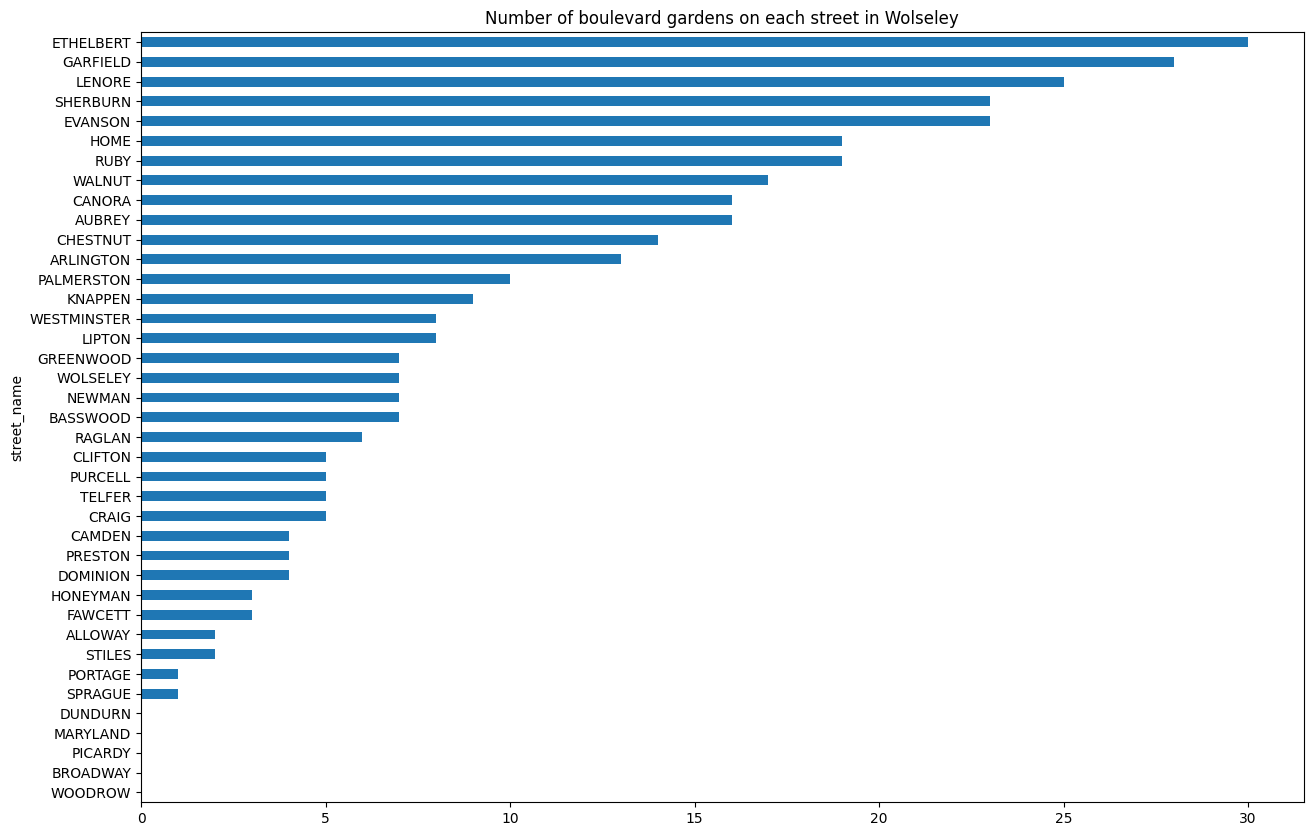

In [6]:
df.groupby('street_name')['has_garden'].sum().sort_values().plot(
    kind='barh', 
    figsize=(15,10), 
    title='Number of boulevard gardens on each street in Wolseley')

#### The top streets are:
- Ethelbert
- Garfield
- Lenore
- Sherburn
- Evanson

All of these are located in what I would consider the central part of the neighbourhood. 
Let's go deeper...

### Which are the _richest_ streets in Wolseley?
(in this case assuming wealth can be tied to property value, rather than pulling in another data set...)

In [7]:
df.groupby('street_name')['total_assessed_value'].mean().sort_values(ascending=False)

street_name
PORTAGE        1.371415e+06
WOLSELEY       6.594403e+05
WOODROW        6.357938e+05
PALMERSTON     6.064937e+05
MARYLAND       5.493147e+05
RAGLAN         5.275789e+05
GREENWOOD      4.911833e+05
ETHELBERT      4.528000e+05
WESTMINSTER    4.461364e+05
ALLOWAY        4.306087e+05
HOME           4.228221e+05
PRESTON        4.222940e+05
PICARDY        4.217222e+05
CANORA         4.215417e+05
ARLINGTON      4.198810e+05
DOMINION       4.180250e+05
LENORE         3.978864e+05
RUBY           3.766325e+05
DUNDURN        3.688889e+05
EVANSON        3.684672e+05
LIPTON         3.676466e+05
SPRAGUE        3.672400e+05
CHESTNUT       3.642475e+05
GARFIELD       3.565778e+05
PURCELL        3.487308e+05
SHERBURN       3.380370e+05
WALNUT         3.375057e+05
BASSWOOD       3.368679e+05
HONEYMAN       3.306000e+05
NEWMAN         3.285200e+05
AUBREY         3.219160e+05
TELFER         3.072034e+05
CLIFTON        3.047955e+05
CAMDEN         3.033333e+05
FAWCETT        3.018829e+05
CRAIG   

<Axes: title={'center': 'Average property value of buildings on each Wolseley street, with five greenest streets highlighted'}, ylabel='street_name'>

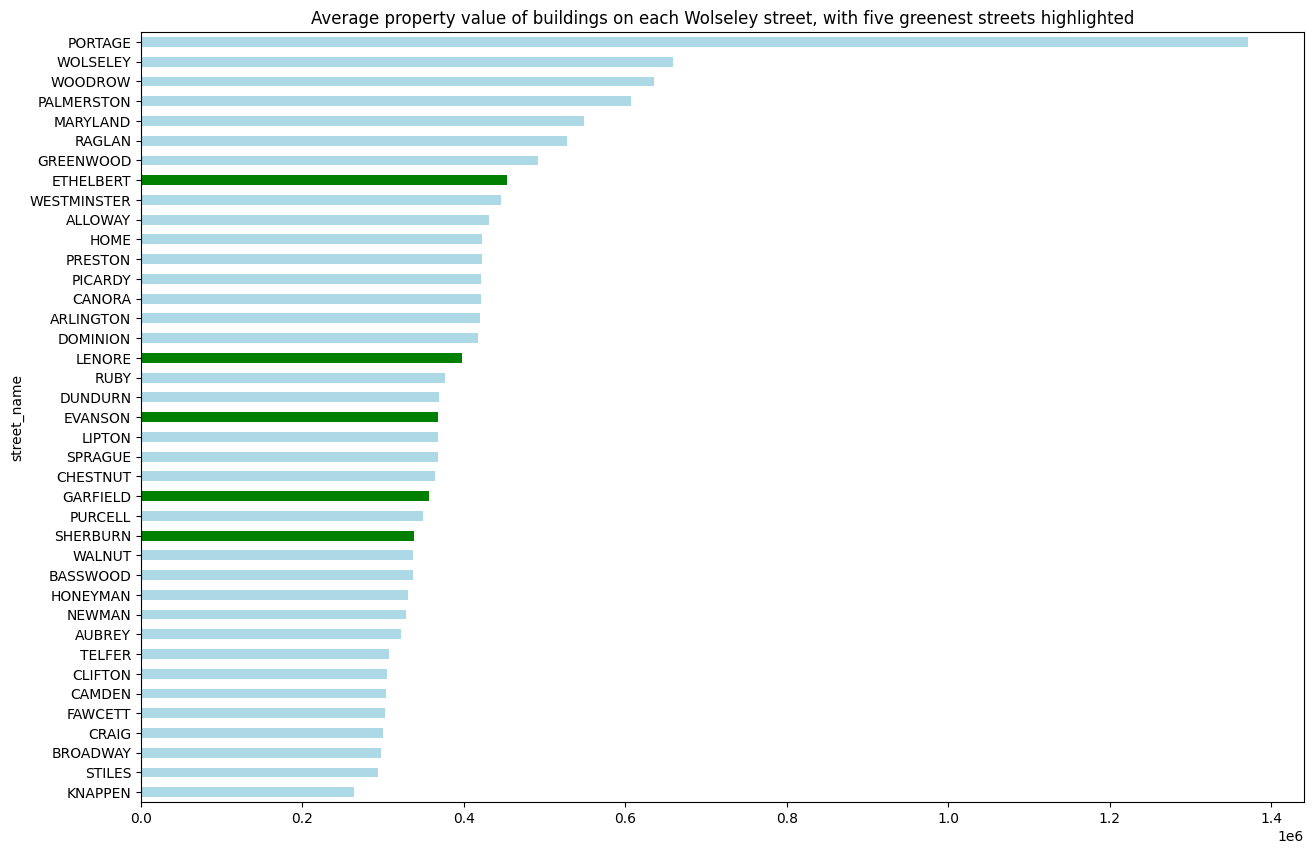

In [8]:
# Going to plot this again because, well, it's nicer to look at

# Within this plot, I'm also going to highlight our top 5 garden streets
# I found this suggestion on r/learnpython please blame reddit and not me if it doesn't make sense

colors = ['lightblue'] * 39
# where 39 is number of streets

top_gardens = [13,15,19,22,31]
# counting from the bottom of the above list, because the sorting will be reversed in the plot
for garden in top_gardens:
    colors[garden] = 'g'

# Now let's plot
df.groupby('street_name')['total_assessed_value'].mean().sort_values().plot(
    kind='barh', 
    figsize=(15,10), 
    title='Average property value of buildings on each Wolseley street, with five greenest streets highlighted',
    color = colors
)

#### WOAH! What's happening here?

Some context that I probably should have outlined much earlier...

This is Wolseley: ![an outline of the Wolseley neighbourhood](https://roadtripmanitoba.com/wp-content/uploads/2023/07/Wolseley-Map.jpg)

The northern boundary is Portage Avenue, aka Highway 1, a major artery through the city (through the country, actually, but that's a story for another day) that is predominantly made up of commercial and insitutional buildings. The southern boundary is the Assiniboine River, one of the two major rivers that gave Winnipeg its name (from the Cree for muddy waters). The eastern boundary is Maryland Street, another commercial strip. And the western boundary is a large park called Omand's Creek and a set of train tracks. The two main east-west roads are Wolseley and Westminster Avenues, which are a mix of residential homes, multi-unit complexes and commercial builings. 

Therefore, Portage Ave, Wolseley Ave, Westminster Ave and Maryland St have higher property values than most. 

So I need to go a little deeper...

### Adding some geographic categories:

The goal here is to test my theory that wealthier areas of the neighbourhood have higher concentrations of these boulevard gardens. Anecdotally, the southern half of Wolseley is considered the "richer" part of the neighbourhood (big houses along the river, yknow) as are the parts of town further west. 

To test this theory, I am going to add two geographic fields for each home on the list: 
 - n_s — a relative latitude. This will be calculated slightly crudely (for simplicity's sake). I will determine the approximate minimum latitude of Westminster Ave (what I would consider the middle point of the neighbourhood). This field will then calculate whether the property's centroid lat is greater or less than this value and return either north or south.
 - position - a relative longitude. Once again a crude and sort of subjective calculation, but this will operate based on street name and a general understanding of the neighbourhood. I will create three buckets - West, Central, East.
     - Raglan to Dominion are the "west" portion of the neighbourhood. That's where Westminster ends, and if you live east of Dominion, it sort of feels like the edge of the neighbourhood.
     - Garfield to Canora is "central" Wolseley. Canora is the edge of Vimy Park. Vimy is the last big landmark on Portage ave before the road curves off. The shape of the neighbourhood changes past the park slightly.
     - Chestnut and everything further east are considered "east" wolseley.


To calculate these longitude limits, I will group addresses on Dominion and Canora and find the max centroid longitude, or the most eastern point.

In [9]:
# Calculating longitude "bins"

west_limit = df[df['street_name'] == 'DOMINION'].centroid_lon.max()
cen_limit = df[df['street_name'] == 'CANORA'].centroid_lon.max()

In [10]:
# Calculate the mid-line

mid_line = df[df['street_name'] == 'WESTMINSTER'].centroid_lat.min()

In [11]:
# First, create n_s column and assign values
df['n_s'] = df['centroid_lat'].apply(lambda lat: 'North' if lat > mid_line else 'South')

In [12]:
# Slightly more messy now, the position column
# Nesting to create an elif 

df['position'] = df['centroid_lon'].apply(lambda lon: 'West' if lon <= west_limit else ('Central' if lon <= cen_limit else 'East'))

In [13]:
df

,roll_number,full_address,has_garden,total_assessed_value,street_number,street_name,property_use_code,geometry,centroid_lat,centroid_lon,n_s,position
0,1.208178e+10,1 LENORE STREET,False,232000.0,1.0,LENORE,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17150633999906 49.87741594...,49.877380,-97.171700,South,Central
1,1.208269e+10,1-130 ETHELBERT STREET,False,452000.0,130.0,ETHELBERT,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.1679152061011 49.880671003...,49.880723,-97.167717,South,Central
2,1.208232e+10,1-156 EVANSON STREET,False,643000.0,156.0,EVANSON,RESTR - TRIPLEX,MULTIPOLYGON (((-97.17075433751634 49.88213778...,49.882100,-97.170927,North,Central
3,1.208258e+10,1-230 HOME STREET,False,504000.0,230.0,HOME,RESMC - MULTIFAMILY CONVERSION,MULTIPOLYGON (((-97.16846992448545 49.88357347...,49.883535,-97.168686,North,Central
4,1.208234e+10,1-273 EVANSON STREET,False,486000.0,273.0,EVANSON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17033900169139 49.88433314...,49.884369,-97.170166,North,Central
...,...,...,...,...,...,...,...,...,...,...,...,...
2477,1.208182e+10,99 LENORE STREET,False,319000.0,99.0,LENORE,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17166769231686 49.88057380...,49.880613,-97.171469,South,Central
2478,1.208195e+10,99 RUBY STREET,False,343000.0,99.0,RUBY,RESSD - DETACHED SINGLE DWELLING,MULTIPOLYGON (((-97.17243277640833 49.88023511...,49.880196,-97.172632,South,Central
2479,1.208173e+10,990 PALMERSTON AVENUE,False,677000.0,990.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.17380593689371 49.87648087...,49.876895,-97.173870,South,Central
2480,1.208173e+10,994 PALMERSTON AVENUE,False,773000.0,994.0,PALMERSTON,RESDU - DUPLEX,MULTIPOLYGON (((-97.1739956167079 49.876496214...,49.876905,-97.174060,South,Central


### What's the geographic layout of the neighbourhood?

In [14]:
df['position'].value_counts()

position
Central    1340
West        689
East        453
Name: count, dtype: int64

Most addresses are "central"! This makes sense to me. 
It's definitely influenced by my analysis being somewhat vibes-based (how residents kind of classify the neighbourhood) vs three equal bins

In [15]:
df['n_s'].value_counts()

n_s
North    1276
South    1206
Name: count, dtype: int64

We have a generally balanced north/south split! That's cool! 

In [16]:
df[['n_s','position']].value_counts()

n_s    position
South  Central     752
North  Central     588
South  West        352
North  East        351
       West        337
South  East        102
Name: count, dtype: int64

In [17]:
df[['n_s','position']].value_counts().to_csv("geo_breakdown_total.csv")

## Property value / garden analysis ... with geography

### First, let's make a street-by-street analysis table:

This is in effect a pivot table which will allow us to group the data by street for some simple, clean visualization.


To start, the columns are:
- count: total buildings
- gardens: count of has_garden == True 
- garden_percent: gardens divided by count * 100 
- avg_value: mean property value of all buildings

In [18]:
by_street = {'count': df.groupby('street_name')['roll_number'].nunique(), 'gardens':df.groupby('street_name')['has_garden'].sum(), 'garden_percent': (df.groupby('street_name')['has_garden'].sum()/df.groupby('street_name')['roll_number'].nunique())*100, 'avg_value': df.groupby('street_name')['total_assessed_value'].mean()}
by_street = pd.DataFrame.from_dict(by_street) 
by_street

,count,gardens,garden_percent,avg_value
street_name,,,,
ALLOWAY,23,2,8.695652,4.306087e+05
ARLINGTON,126,13,10.317460,4.198810e+05
AUBREY,119,16,13.445378,3.219160e+05
BASSWOOD,53,7,13.207547,3.368679e+05
BROADWAY,9,0,0.000000,2.970000e+05
CAMDEN,48,4,8.333333,3.033333e+05
CANORA,72,16,22.222222,4.215417e+05
CHESTNUT,101,14,13.861386,3.642475e+05
CLIFTON,44,5,11.363636,3.047955e+05


<Axes: ylabel='street_name'>

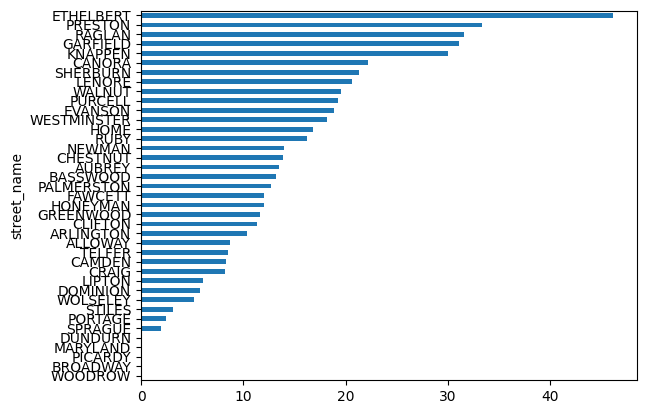

In [19]:
# Garden density by block:
# This feels like a more accurate representation of the relative 'greenness' of the street as opposed to just counts!
by_street['garden_percent'].sort_values().plot( kind='barh')

### Residential only:
I am going to filter the main dataframe for single residential properties to try and simplify the property value conversation. Apartments are not included as the property value is for the entire property. Condo complexes have been simplified in data cleaning and can be included.

The residential property use codes include: 'RESSD - DETACHED SINGLE DWELLING', 'RESMC - MULTIFAMILY CONVERSION', 'RESTR - TRIPLEX', 'RESDU - DUPLEX', 'VRES1 - VACANT RESIDENTIAL 1', 'RESSU - RESIDENTIAL SECONDARY UNIT', 'RESRM - ROOMING HOUSE', 'RESMU - RESIDENTIAL MULTIPLE USE', 'RESSS - SIDE BY SIDE', 'CNCMP - CONDO COMPLEX', 'CNRES - CONDO RESIDENTIAL', 'RESMA - MULTIPLE ATTACHED UNITS', 'RESMB - RESIDENTIAL MULTIPLE BUILDINGS'

In [20]:
df.property_use_code.unique()

array(['RESSD - DETACHED SINGLE DWELLING',
       'RESMC - MULTIFAMILY CONVERSION', 'RESTR - TRIPLEX',
       'RESDU - DUPLEX', 'VRES1 - VACANT RESIDENTIAL 1',
       'RESAP - APARTMENTS', 'CNCOM - CONDO COMMERCIAL', 'CMRST - STORE',
       'CMOFF - OFFICE', 'CMSTP - STRIP MALL', 'CMRRE - RESTAURANT',
       'RESSU - RESIDENTIAL SECONDARY UNIT', 'CMRCV - CONVENIENCE STORE',
       'RESRM - ROOMING HOUSE', 'CMFBK - BANK',
       'RESMU - RESIDENTIAL MULTIPLE USE', 'RESSS - SIDE BY SIDE',
       'PIIDC - DAY CARE', 'RESAM - APARTMENTS MULTIPLE USE',
       'RESGC - RESIDENTIAL GROUP CARE',
       'CMCMU - COMMERCIAL MULTIPLE USE',
       'PIIGC - NON-RESIDENTIAL GROUP CARE', 'CNCMP - CONDO COMPLEX',
       'CMMRH - COMMERCIAL ROW HOUSE', 'CNRES - CONDO RESIDENTIAL',
       'RESMA - MULTIPLE ATTACHED UNITS',
       'RESMB - RESIDENTIAL MULTIPLE BUILDINGS',
       'CMOMC - MEDICAL OFFICE CLINIC', 'PIRCC - COMMUNITY CENTRE'],
      dtype=object)

In [21]:
residential = df[df['property_use_code'].isin(['RESSD - DETACHED SINGLE DWELLING', 'RESMC - MULTIFAMILY CONVERSION', 'RESTR - TRIPLEX', 'RESDU - DUPLEX', 'VRES1 - VACANT RESIDENTIAL 1', 'RESSU - RESIDENTIAL SECONDARY UNIT', 'RESRM - ROOMING HOUSE', 'RESMU - RESIDENTIAL MULTIPLE USE', 'RESSS - SIDE BY SIDE', 'CNCMP - CONDO COMPLEX', 'CNRES - CONDO RESIDENTIAL','RESMA - MULTIPLE ATTACHED UNITS','RESMB - RESIDENTIAL MULTIPLE BUILDINGS'])]

## Property value analysis:

### Where are the wealthiest parts of Wolseley?

#### First, by street, looking at the filtered view for residential properties:

In [22]:
residential.groupby('street_name').total_assessed_value.mean().sort_values(ascending=False).head(10)

street_name
PALMERSTON     586474.358974
WOLSELEY       529322.314050
RAGLAN         527578.947368
ETHELBERT      454301.587302
CANORA         421541.666667
DOMINION       418025.000000
HOME           414391.921769
GREENWOOD      394474.576271
PRESTON        390684.343434
WESTMINSTER    386096.774194
Name: total_assessed_value, dtype: float64

<Axes: ylabel='street_name'>

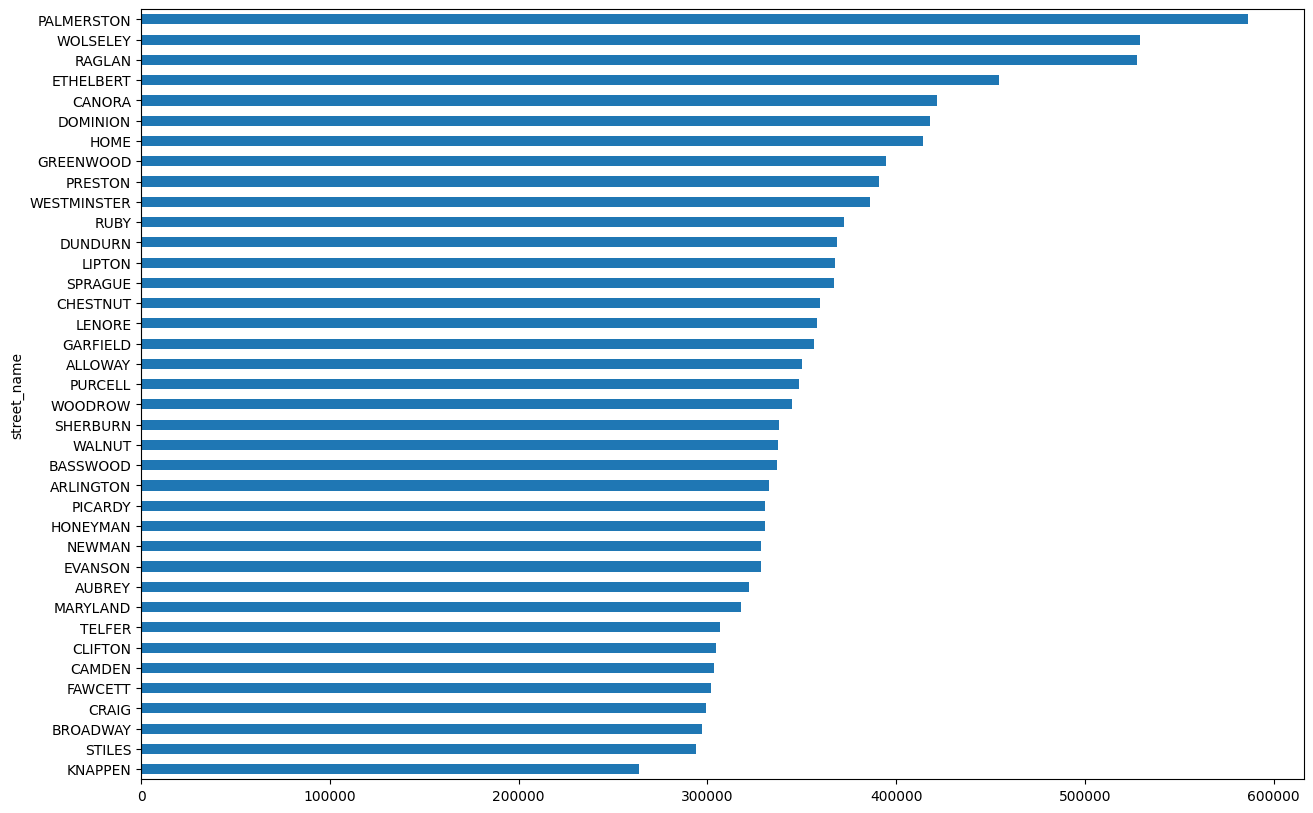

In [23]:
residential.groupby('street_name').total_assessed_value.mean().sort_values().plot(kind = 'barh', figsize=(15,10))

That makes sense, anecdotally. Palmerston is visibly the wealthiest street in the neighbourhood, with higher prop values likely linked to river proximity, and to the fact these are giant castle houses with Porsche's parked out front. 

<Axes: title={'center': 'Average property value of buildings on each Wolseley street, with five greenest streets highlighted'}, ylabel='street_name'>

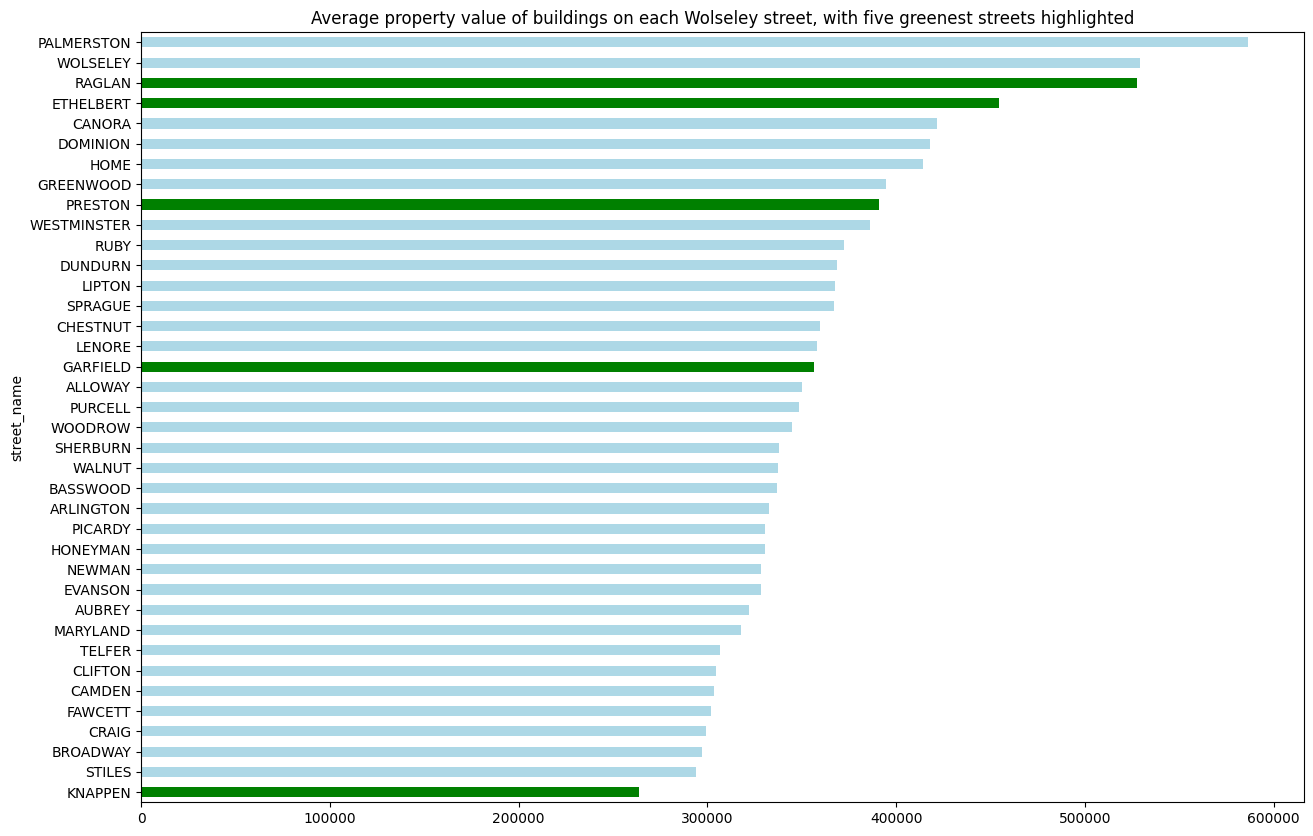

In [24]:
# Highlight top 5 garden-dense streets on prop val chart, as we did at the beginning:
# Top garden density Ethelbert, Preston, Raglan, Garfield, Knappen 

colors = ['lightblue'] * 38
# Where 38 is the number of streets

top_gardens = [0, 21, 29, 34, 35]

for garden in top_gardens:
    colors[garden] = 'g'

# Now let's plot
residential.groupby('street_name').total_assessed_value.mean().sort_values().plot(
    kind='barh', 
    figsize=(15,10), 
    title='Average property value of buildings on each Wolseley street, with five greenest streets highlighted',
    color = colors)


With this analysis, **Knappen** really stands out. 

#### Now by geography, starting with north/south:

In [25]:
residential.groupby('n_s').total_assessed_value.mean()

n_s
North    347157.084265
South    394140.577572
Name: total_assessed_value, dtype: float64

<Axes: xlabel='n_s'>

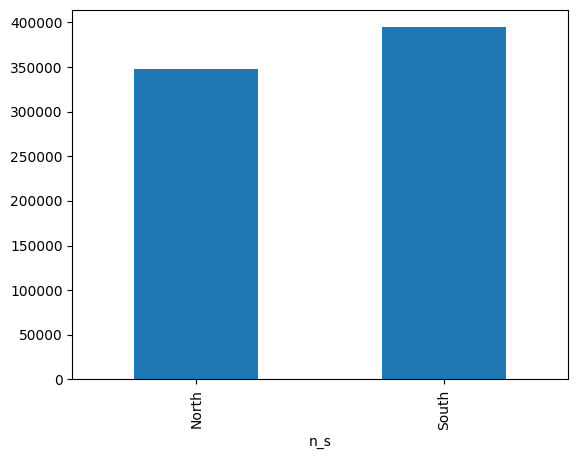

In [26]:
residential.groupby('n_s').total_assessed_value.mean().plot(kind='bar')

The average property value is slightly higher in the south vs north! Again, not too shocking. The difference seems fairly minor.

#### Geography, east/west:

In [27]:
residential.groupby('position').total_assessed_value.mean()

position
Central    378628.916226
East       339552.366814
West       374637.350299
Name: total_assessed_value, dtype: float64

<Axes: ylabel='position'>

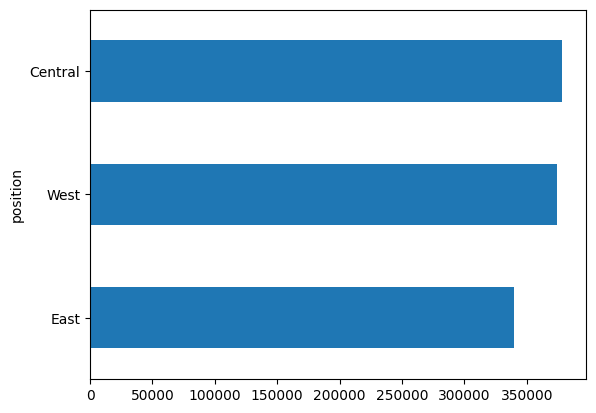

In [28]:
residential.groupby('position').total_assessed_value.mean().sort_values().plot(kind='barh')

Central is actually highest! With west nearly neck and neck, and east dipping slightly. Interesting!

## Gardens geographic analysis:

First, I need a filtered view which examines only properties with gardens to run some similar analysis.

In [29]:
gardens = df[df['has_garden'] == True]

#### Where are the gardens? North/South

<Axes: ylabel='n_s'>

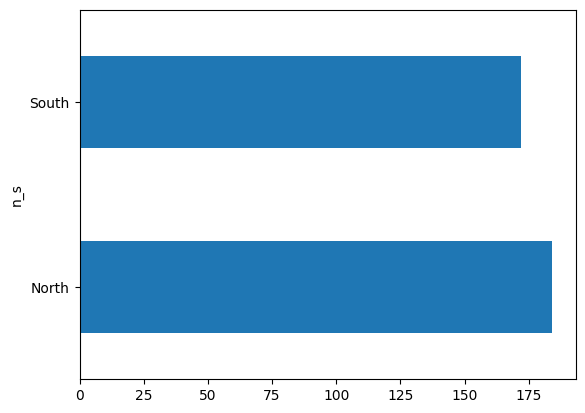

In [30]:
gardens['n_s'].value_counts().plot(kind='barh')

In [31]:
gardens['n_s'].value_counts()

n_s
North    184
South    172
Name: count, dtype: int64

Interesting! By count alone there are more gardens in the north. However, there are also more houses in the north. So we need to do a little analysis here...

In [32]:
# What percentage of buildings in the north vs south have gardens. 

gardens['n_s'].value_counts()/df['n_s'].value_counts()

n_s
North    0.144201
South    0.142620
Name: count, dtype: float64

It's actually about a dead split! Fascinating!

#### Where are the gardens, east/west/central?


<Axes: ylabel='position'>

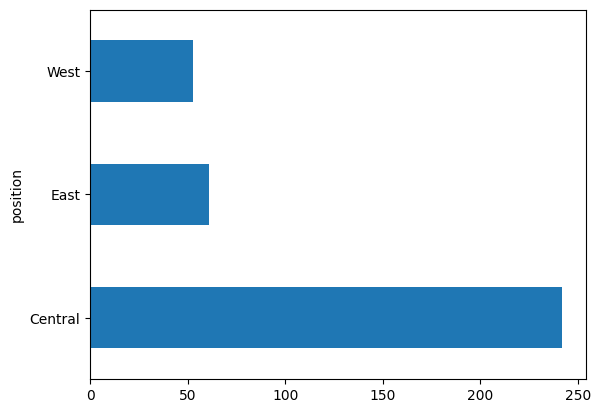

In [33]:
# Outright counts first:

gardens['position'].value_counts().plot(kind='barh')

In [34]:
# Unsurprisingly skewed SUPER central. Now let's compare percentages:

gardens['position'].value_counts()/df['position'].value_counts()

position
Central    0.180597
East       0.134658
West       0.076923
Name: count, dtype: float64

<Axes: ylabel='position'>

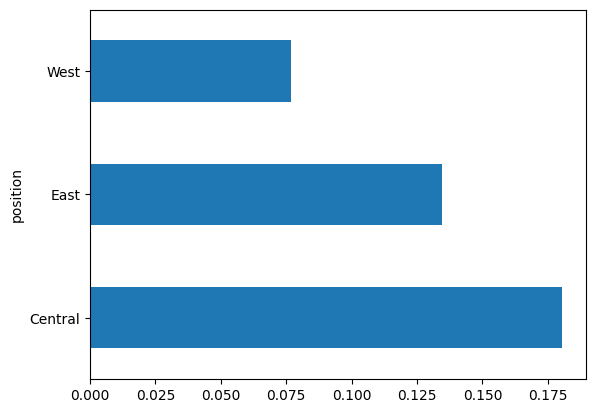

In [35]:
(gardens['position'].value_counts()/df['position'].value_counts()).plot(kind='barh')

We see a little more balance here, but again central takes the cake, with the west surprising me by being the least populated with gardens, despite a slightly higher overall property value. Very cool!

## Looking past the averages, do the gardens tend to be planted at homes with higher property values?

Really this is the core question of this analysis. I want to understand who has access to these beautfying features. We've done this by looking at the general geography, where homes with gardens are compared to the property values in those areas. Now I want to look granularly by analysing the overall distribution of property values for homes with gardens (filtered for residential so as not to skew things too much, which unfortunately means sacrificing a couple apartments with gardens) compared to the neighbourhood at large.

<Axes: >

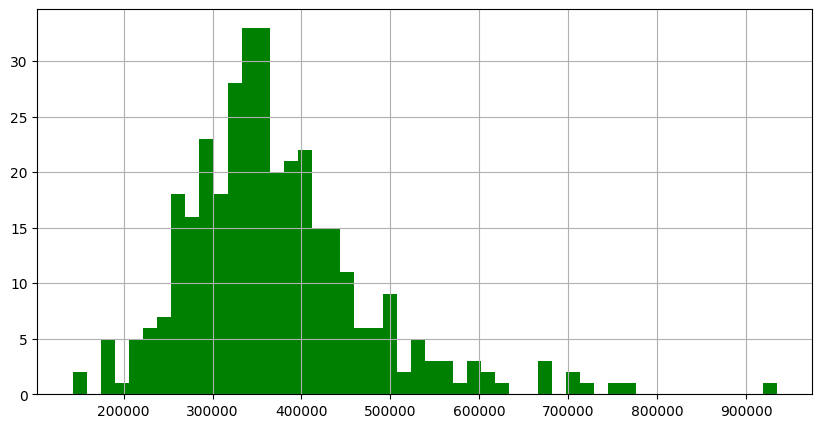

In [36]:
# Will use the residential frame for this:

# Filter for properties with gardens, look at property values and plot a histogram
residential[residential['has_garden'] == True]['total_assessed_value'].hist( 
    bins = 50, figsize=(10,5), color = 'green')

<Axes: >

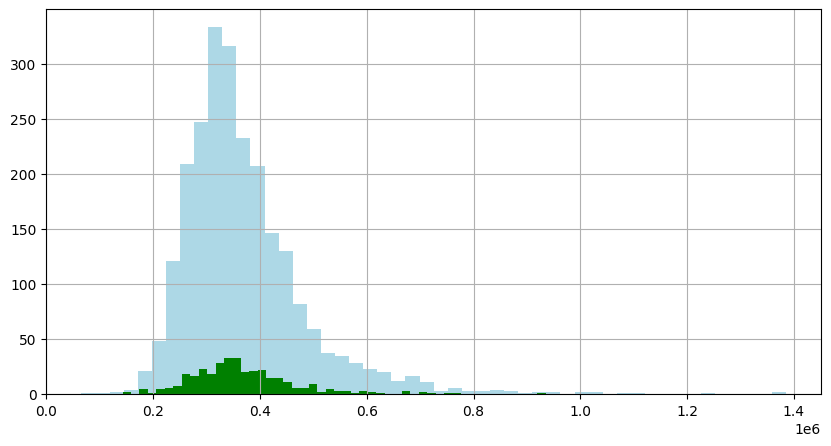

In [37]:
# Now to add another layer, the overall property value distribution for Wolseley residential properties:

# Overall hist (light blue)
residential['total_assessed_value'].hist( 
    bins = 50, figsize=(10,5), color = 'lightblue')
# Garden hist (green)
residential[residential['has_garden'] == True]['total_assessed_value'].hist( 
    bins = 50, figsize=(10,5), color = 'green')

Visually, it appears that these histograms are actually fairly close to even. Nothing stands out dramatically in the data. 


#### Just to be sure, we'll look at the describe for both:

In [38]:
# Overall prop val distribution
residential['total_assessed_value'].describe()

count    2.378000e+03
mean     3.705896e+05
std      1.195564e+05
min      6.535000e+04
25%      2.960000e+05
50%      3.460000e+05
75%      4.157500e+05
max      1.385000e+06
Name: total_assessed_value, dtype: float64

In [39]:
# Garden prop val distribution
residential[residential['has_garden'] == True]['total_assessed_value'].describe()

count       349.000000
mean     370394.062401
std      104565.637107
min      142527.777778
25%      307000.000000
50%      354000.000000
75%      414000.000000
max      935000.000000
Name: total_assessed_value, dtype: float64

While the mean is nearly identical, the min and 25% values skew higher for gardens than the overall distribution. 

## A quick map!

Just a base visualization of the homes with gardens

In [40]:
import shapely
from shapely import wkt

df['geometry'] = df['geometry'].apply(wkt.loads)

<Axes: >

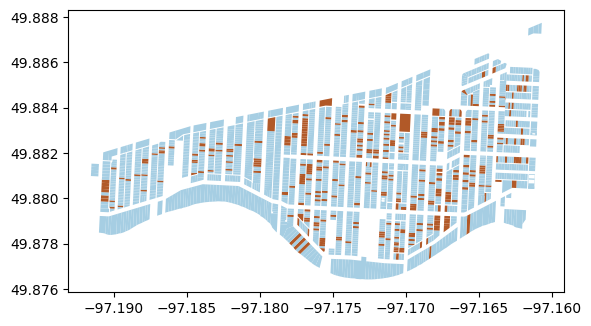

In [41]:
gdf = gpd.GeoDataFrame(df, crs='epsg:4326')
gdf.plot(column = 'has_garden', cmap='Paired')

# Exporting data tables

To prep this analysis for visualization, I will download some data tables and compile in a google sheets.

## Main data tables:

Full dataset: "wolseley_gardens_all.csv"

Residential only: "wolseley_gardens_residential.csv"

Gardens only: "wolseley_gardens_true.csv"

In [42]:
df.to_csv("wolseley_gardens_all.csv")
residential.to_csv("wolseley_gardens_residential.csv")
gardens.to_csv("wolseley_gardens_true.csv")

### 1: Wolseley streets with the highest residential property values, with greenest streets highlighted:

For this table I need: 
- street names
- garden density
- average residential property value

I am borrowing the by_street table but changing average value to the residential value

In [43]:
table_1 = {'count': df.groupby('street_name')['roll_number'].nunique(), 'gardens':df.groupby('street_name')['has_garden'].sum(), 'garden_percent': (df.groupby('street_name')['has_garden'].sum()/df.groupby('street_name')['roll_number'].nunique())*100, 'avg_value': residential.groupby('street_name')['total_assessed_value'].mean()}
street_analysis = pd.DataFrame.from_dict(table_1) 
street_analysis.to_csv("wolseley_gardens_graphic_1.csv")

#### Remaining visualization charts were completed in Google Sheets because it was the kind of process that works better with a more visual-first tool (in my opinion). That sheet, which includes the main datasets and all subsets used for visualisation, can be found [here](https://docs.google.com/spreadsheets/d/1IeOu35yQJ4RAEbabA8aEWwJZCKJERbaBUjD9nzCHjVA/edit?usp=sharing).